# Exploratory data analysis. Data exploration and visualization.

## Text description of the data set

As a data set, we will use a data set
for predicting diabetes in women - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

The purpose of the dataset is diagnostic to predict whether a patient has diabetes or not, based on certain diagnostic measurements included in the dataset. Several restrictions were imposed on the selection of these instances from a larger database. In particular, all the patients here are women aged at least 21 years of Indian Pima origin. This task is relevant, because the number of patients is growing every year.

The dataset consists of a single file:
- diabetes.csv

The file contains the following columns:
- Pregnancies - number of pregnancies
- Glucose - the concentration of glucose in the blood plasma after 2 hours with an oral glucose tolerance test.
- Blood Pressure - diastolic blood pressure (mmHg).
- Skin Thickness - thickness of the triceps skin fold (mm).
- Insulin - 2-hour serum insulin (mked/ml).
- BMI - body mass index (weight in kg / (height in m)^2).
- Diabetes Pedigree - Diabetes Pedigree function.
- Age - age (years).
- Outcome - class variable (0 or 1).

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import data 

In [3]:
data = pd.read_csv('diabetes.csv')

# 2) The main characteristics of the dataset

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
data['Glucose'].fillna(data['Glucose'].median(), inplace =True)

data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace =True)

data['BMI'].fillna(data['BMI'].median(), inplace =True)

In [11]:
by_Glucose_Age_Insulin_Grp = data.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
data['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [12]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].mean())


In [13]:
by_BMI_Insulin = data.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
data['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [14]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace= True)

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      28.614922  148.888587   
std       3.369578   30.438286      12.096642       9.648424  100.472514   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      22.000000   88.000000   
50%       3.000000  117.000000      72.000000      28.614922  130.000000   
75%       6.000000  140.250000      80.000000      35.000000  175.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [17]:
# Define unique values for the target attribute

data['Outcome'].unique()

array([1, 0], dtype=int64)

The target attribute is binary and contains only the values 0 and 1.

# 3) Visual examination of dataset

### Scattering plot
Allows you to plot the distribution of two columns of data and visually detect the presence of a dependency. It is not assumed that the values are ordered (for example, by time).

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

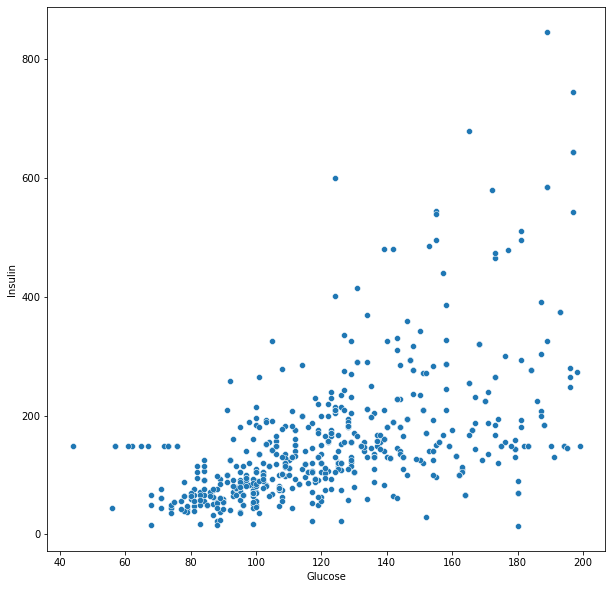

In [18]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Glucose', y='Insulin', data=data)

We see an obvious linear dependence

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

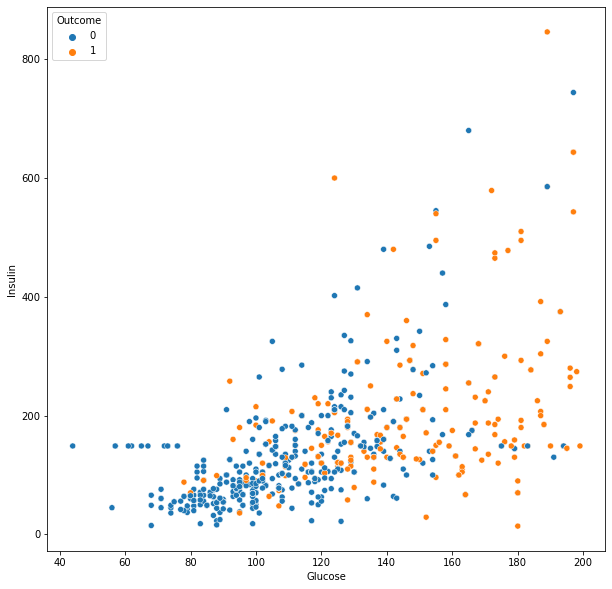

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Glucose', y='Insulin', data=data, hue='Outcome')

## Histogram
Allows you to estimate the probability density of the data distribution.

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

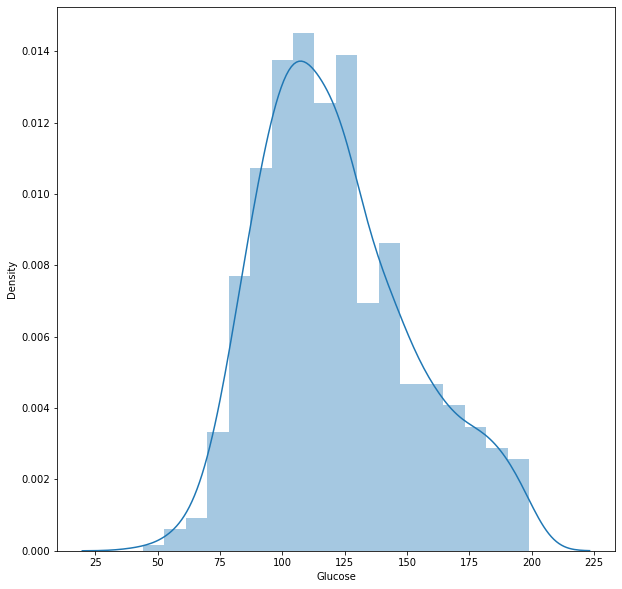

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Glucose'])

### Jointplot
A combination of histograms and scatter plots.

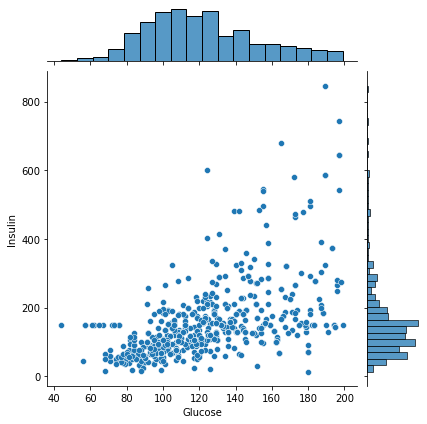

In [21]:
sns.jointplot(x='Glucose', y='Insulin', data=data)

### "Paired charts"
A combination of histograms and scatter plots for the entire dataset.

A matrix of graphs is output. A scattering diagram is constructed at the intersection of a row and a column that correspond to two indicators. Histograms of the distribution of the corresponding indicators are plotted in the main diagonal of the matrix.

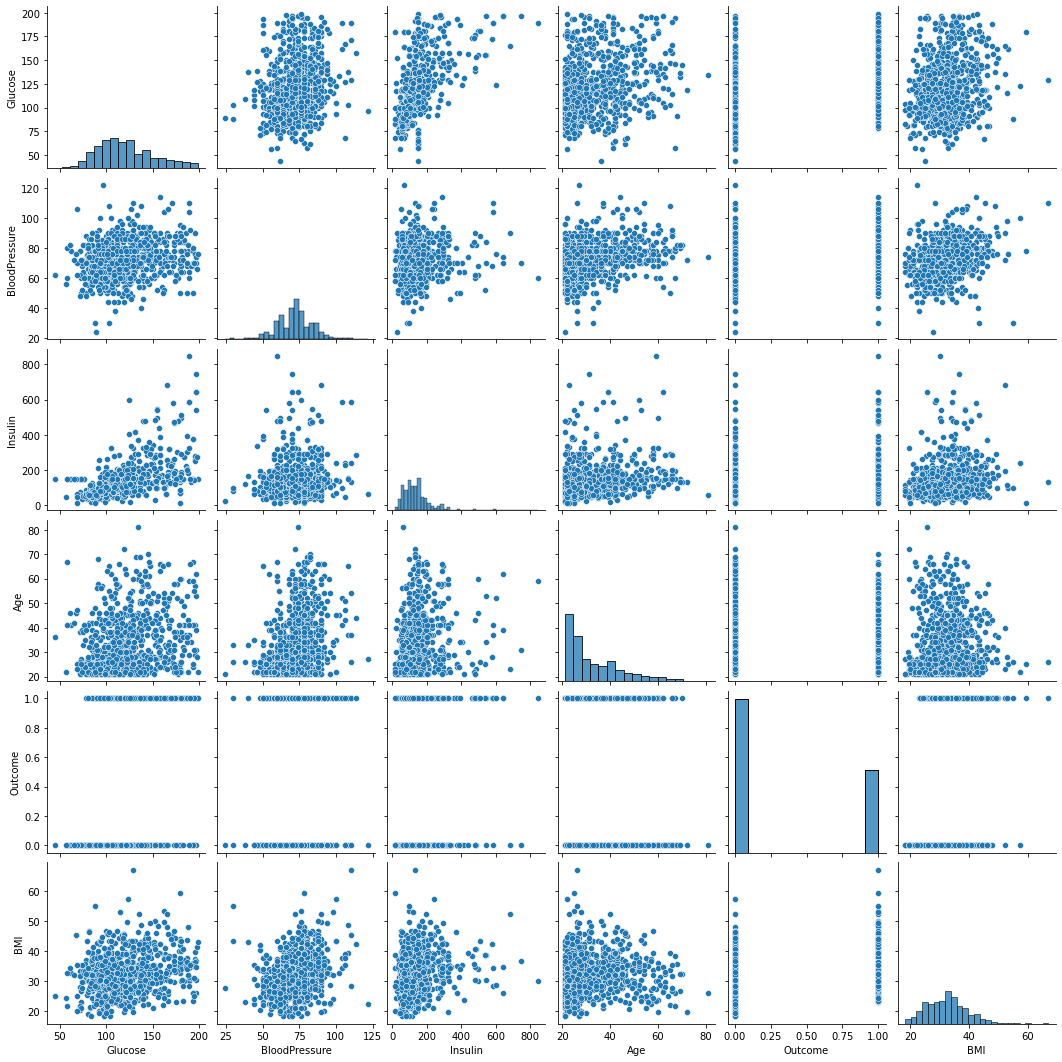

In [22]:
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')

### Box-and-whiskers diagram 
Displays a one-dimensional probability distribution.

<AxesSubplot:xlabel='SkinThickness'>

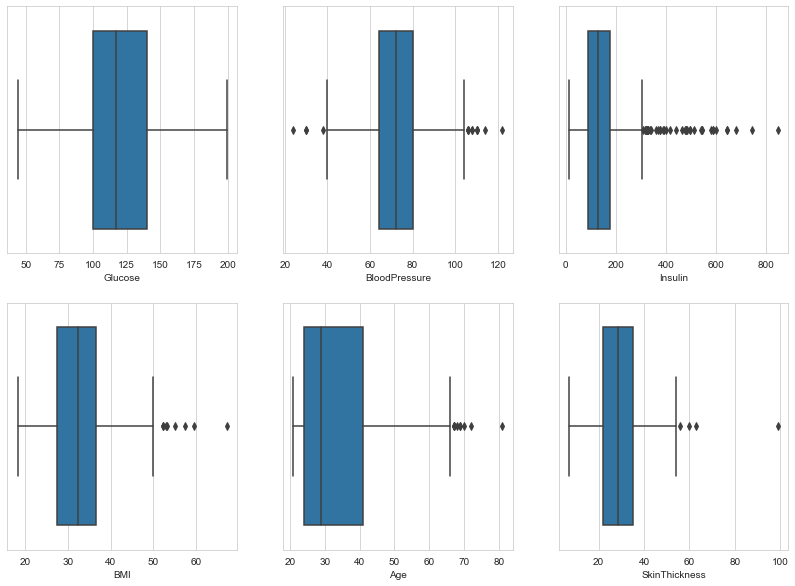

In [23]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

### Violin plot
Similar to the previous diagram, but the density distributions are displayed at the edges -

<AxesSubplot:xlabel='Glucose'>

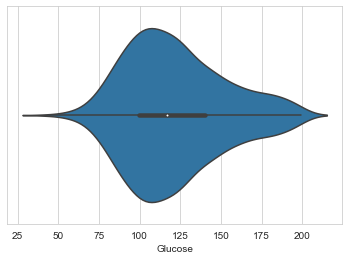

In [24]:
sns.violinplot(x=data['Glucose'])

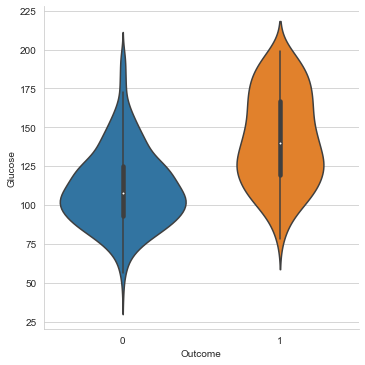

In [25]:
sns.catplot(y='Glucose', x='Outcome', data=data, kind="violin", split=True)

# 4) Information about the correlation of features

In [26]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.064381   
Glucose                      0.128213  1.000000       0.218937       0.188996   
BloodPressure                0.208615  0.218937       1.000000       0.183123   
SkinThickness                0.064381  0.188996       0.183123       1.000000   
Insulin                      0.046741  0.566640       0.125499       0.210167   
BMI                          0.021559  0.231049       0.281257       0.636708   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.128380   
Age                          0.544341  0.266909       0.324915       0.108672   
Outcome                      0.221898  0.492782       0.165723       0.232150   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.046741  0.021559                 -0.033523   
Glucose                   0.566640  0.231049                  0.137327   
BloodPressure             0.125499  0.281257                 -0.002378   
SkinThickness             0.210167  0.636708                  0.128380   
Insulin                   1.000000  0.198895                  0.114325   
BMI                       0.198895  1.000000                  0.153438   
DiabetesPedigreeFunction  0.114325  0.153438                  1.000000   
Age                       0.185146  0.025597                  0.033561   
Outcome                   0.279690  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.108672  0.232150  
Insulin                   0.185146  0.279690  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

The correlation matrix contains the correlation coefficients between all pairs of features.

Based on the correlation matrix , the following conclusions can be drawn:
- The target trait correlates most strongly with glucose (0.47). This attribute must be left in the model.
- The target trait is weakly correlated with insulin (0.13) and pedigree function (0.17). Most likely, these signs should be excluded from the model, perhaps they will only worsen the quality of the model.
- Age strongly correlates with the number of pregnancies (0.54).

<AxesSubplot:>

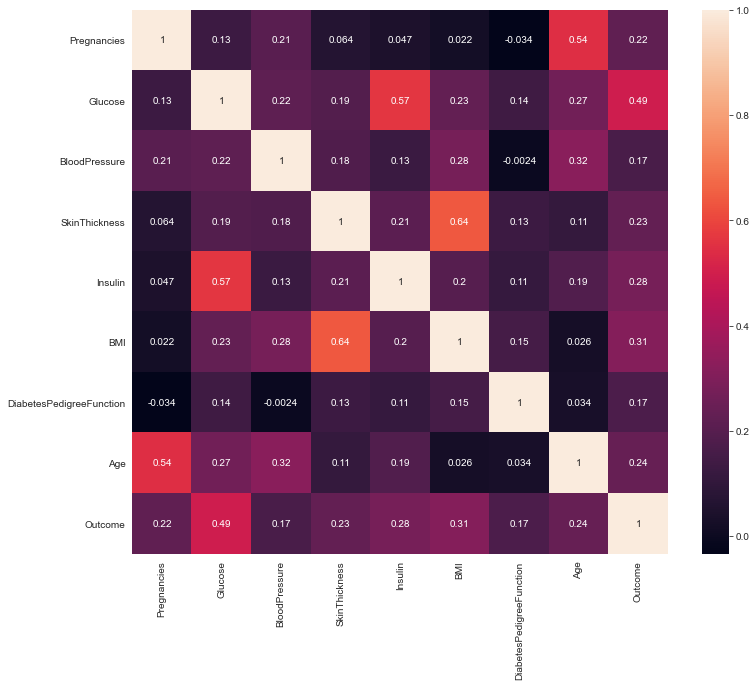

In [27]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)